In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('SBAnational.csv')

/var/folders/pk/ntjyb03d4djbyplk8mmb55jc0000gn/T/ipykernel_80739/3762778299.py:5: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('SBAnational.csv')


In [2]:
df.shape

(899164, 27)

In [3]:
columns=df.columns
print(columns)

Index(['LoanNr_ChkDgt', 'Name', 'City', 'State', 'Zip', 'Bank', 'BankState',
       'NAICS', 'ApprovalDate', 'ApprovalFY', 'Term', 'NoEmp', 'NewExist',
       'CreateJob', 'RetainedJob', 'FranchiseCode', 'UrbanRural', 'RevLineCr',
       'LowDoc', 'ChgOffDate', 'DisbursementDate', 'DisbursementGross',
       'BalanceGross', 'MIS_Status', 'ChgOffPrinGr', 'GrAppv', 'SBA_Appv'],
      dtype='object')


In [4]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
df_copy = df.copy()
le=LabelEncoder()
df_copy['MIS_Status']=le.fit_transform(df_copy['MIS_Status'])
# Convert X and y back to a DataFrame and Series if needed

In [5]:
df_copy['MIS_Status'].unique()

array([1, 0, 2])

In [6]:
X = df_copy[['CreateJob', 'RetainedJob', 'NoEmp']]
y = df_copy['MIS_Status']

In [7]:
correlation_with_target = {col: X[col].corr(y) for col in X.columns}

In [8]:
print(correlation_with_target)

{'CreateJob': -0.011956087427440523, 'RetainedJob': -0.012352378307816695, 'NoEmp': 0.025801637095868135}


In [9]:
df['MIS_Status'].unique()

array(['P I F', 'CHGOFF', nan], dtype=object)

In [10]:
df['MIS_Status'].value_counts()

MIS_Status
P I F     739609
CHGOFF    157558
Name: count, dtype: int64

In [11]:
df_copy['ApprovalDate']=pd.to_datetime(df_copy['ApprovalDate'])
df_copy['Approval_Year']=df_copy['ApprovalDate'].dt.year
df_copy['Approval_Year'].unique()
df_copy

/var/folders/pk/ntjyb03d4djbyplk8mmb55jc0000gn/T/ipykernel_80739/3356469100.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_copy['ApprovalDate']=pd.to_datetime(df_copy['ApprovalDate'])


,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv,Approval_Year
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,1997-02-28,1997,...,Y,NaN,28-Feb-99,"$60,000.00",$0.00,1,$0.00,"$60,000.00","$48,000.00",1997
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,1997-02-28,1997,...,Y,NaN,31-May-97,"$40,000.00",$0.00,1,$0.00,"$40,000.00","$32,000.00",1997
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,1997-02-28,1997,...,N,NaN,31-Dec-97,"$287,000.00",$0.00,1,$0.00,"$287,000.00","$215,250.00",1997
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,1997-02-28,1997,...,Y,NaN,30-Jun-97,"$35,000.00",$0.00,1,$0.00,"$35,000.00","$28,000.00",1997
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,1997-02-28,1997,...,N,NaN,14-May-97,"$229,000.00",$0.00,1,$0.00,"$229,000.00","$229,000.00",1997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
899159,9995573004,FABRIC FARMS,UPPER ARLINGTON,OH,43221,JPMORGAN CHASE BANK NATL ASSOC,IL,451120,1997-02-27,1997,...,N,NaN,30-Sep-97,"$70,000.00",$0.00,1,$0.00,"$70,000.00","$56,000.00",1997
899160,9995603000,FABRIC FARMS,COLUMBUS,OH,43221,JPMORGAN CHASE BANK NATL ASSOC,IL,451130,1997-02-27,1997,...,N,NaN,31-Oct-97,"$85,000.00",$0.00,1,$0.00,"$85,000.00","$42,500.00",1997
899161,9995613003,"RADCO MANUFACTURING CO.,INC.",SANTA MARIA,CA,93455,"RABOBANK, NATIONAL ASSOCIATION",CA,332321,1997-02-27,1997,...,N,NaN,30-Sep-97,"$300,000.00",$0.00,1,$0.00,"$300,000.00","$225,000.00",1997
899162,9995973006,"MARUTAMA HAWAII, INC.",HONOLULU,HI,96830,BANK OF HAWAII,HI,0,1997-02-27,1997,...,Y,8-Mar-00,31-Mar-97,"$75,000.00",$0.00,0,"$46,383.00","$75,000.00","$60,000.00",1997


In [12]:
status_distribution=df_copy.groupby(['Approval_Year','MIS_Status']).size().unstack()

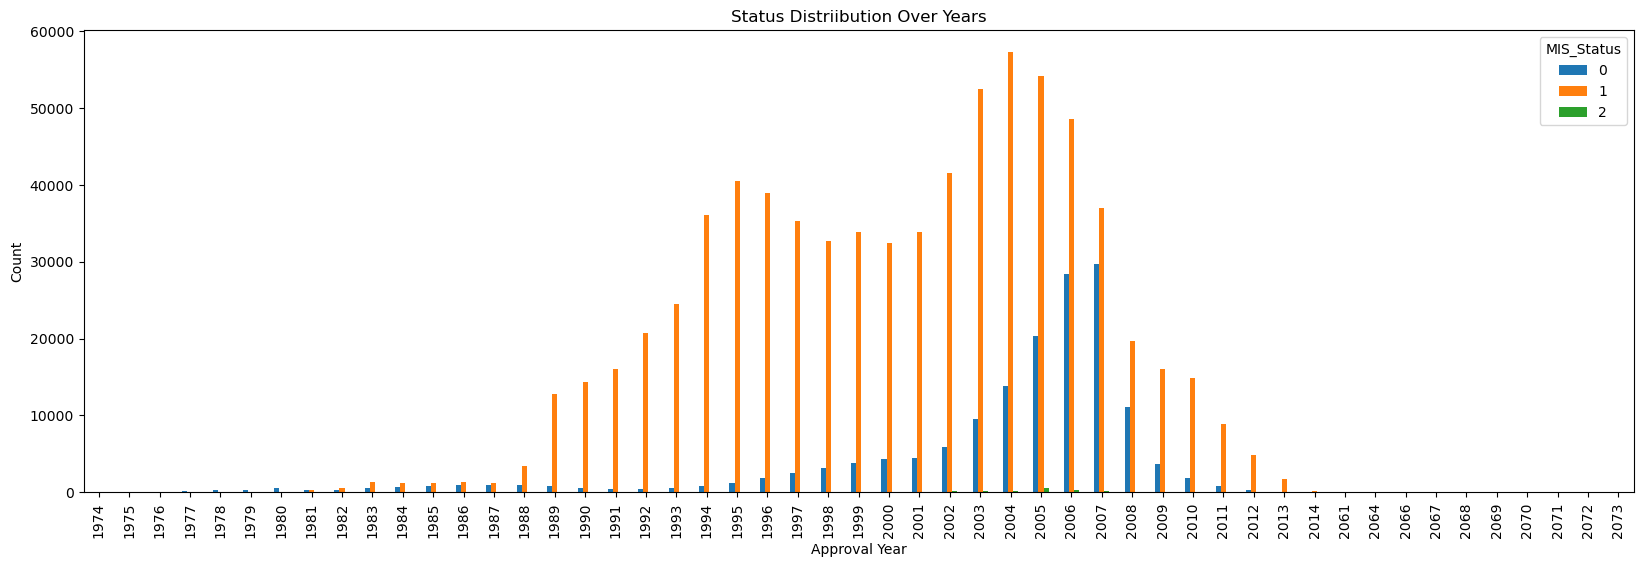

In [13]:
status_distribution.plot(kind='bar',title='Status Distriibution Over Years',figsize=(20,6))
plt.xlabel('Approval Year')
plt.ylabel('Count')
plt.show()

In [14]:
df_copy['GrAppv'] = df_copy['GrAppv'].replace('[\$,]', '', regex=True).astype(float)

In [15]:
mean_approved_yearly=df_copy.groupby('Approval_Year')['GrAppv'].mean()

In [16]:
print("Mean Approved Amount by Year:\n", mean_approved_yearly)

Mean Approved Amount by Year:
 Approval_Year
1974    122834.687500
1975    136951.020408
1976    150461.363636
1977    191335.460993
1978    190638.148148
1979    189020.033241
1980    204571.965278
1981    188599.088629
1982    185089.894366
1983    207542.502706
1984    208037.743101
1985    199291.215548
1986    208224.536852
1987    214638.330528
1988    220689.913916
1989    217940.500958
1990    234422.730236
1991    245249.659488
1992    259198.375059
1993    268401.749041
1994    220143.775317
1995    165928.086864
1996    203846.032119
1997    221816.997033
1998    235708.528435
1999    249502.322182
2000    241694.883139
2001    244091.283242
2002    220750.936037
2003    170257.188218
2004    159738.763556
2005    151132.516808
2006    127389.963779
2007    124436.187507
2008    156729.336711
2009    190599.964714
2010    245378.071897
2011    249916.092037
2012    283648.345933
2013    255476.722864
2014    156023.953125
2061    100000.000000
2064    150000.000000
2066     

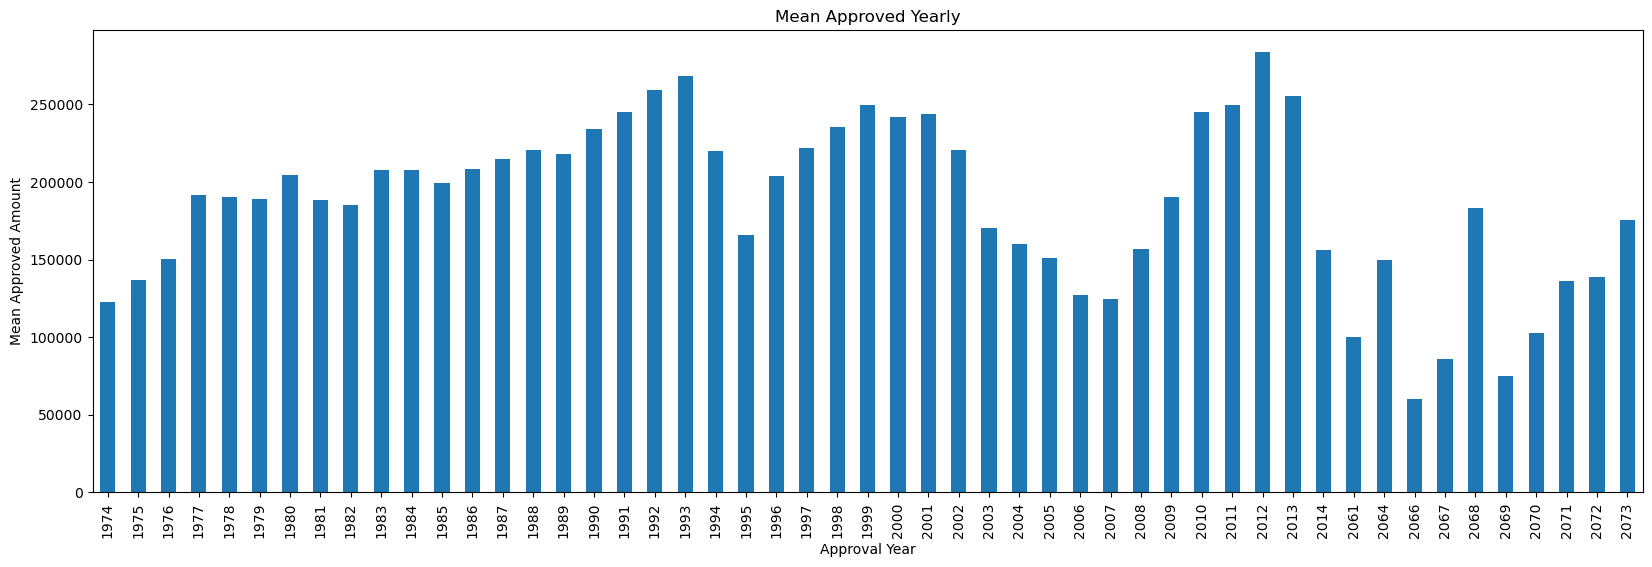

In [17]:
mean_approved_yearly.plot(kind='bar',title='Mean Approved Yearly',figsize=(20,6))
plt.xlabel('Approval Year')
plt.ylabel('Mean Approved Amount')
plt.show()

In [18]:
df_copy['Approval_Year'].unique()

array([1997, 1980, 2006, 1996, 1998, 1999, 2000, 2001, 2071, 2002, 2003,
       2004, 2072, 1978, 1981, 2005, 1979, 2061, 1982, 2064, 2066, 1983,
       1984, 1985, 2007, 1986, 1987, 2073, 2008, 1988, 1989, 2009, 1991,
       1990, 2010, 2067, 2011, 1992, 1993, 2012, 1994, 2013, 1975, 1976,
       1974, 2014, 1977, 2068, 2069, 2070, 1995], dtype=int32)

In [19]:
df_copy.drop(['Approval_Year'],inplace=True,axis=1)

In [20]:
df_copy['Approval_Year']=df_copy['ApprovalDate'].dt.year

In [21]:
df_copy['Approval_Year'].unique()

array([1997, 1980, 2006, 1996, 1998, 1999, 2000, 2001, 2071, 2002, 2003,
       2004, 2072, 1978, 1981, 2005, 1979, 2061, 1982, 2064, 2066, 1983,
       1984, 1985, 2007, 1986, 1987, 2073, 2008, 1988, 1989, 2009, 1991,
       1990, 2010, 2067, 2011, 1992, 1993, 2012, 1994, 2013, 1975, 1976,
       1974, 2014, 1977, 2068, 2069, 2070, 1995], dtype=int32)

In [22]:
future_years = df_copy[df_copy['Approval_Year'] > 2014]
future_years

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv,Approval_Year
649,1004761003,A B KITCHEN CABINETS INC,HIALEAH,FL,33010,WELLS FARGO BANK NATL ASSOC,NC,0,2071-08-13,1972,...,N,31-Oct-88,25-Oct-71,"$100,000.00",$0.00,0,"$46,813.00",100000.0,"$75,000.00",2071
2005,1013581010,JAMES A STEIN,NASHVILLE,TN,37205,BANK OF AMERICA NATL ASSOC,TN,0,2072-02-25,1972,...,N,18-Jan-90,1-Mar-72,"$30,000.00",$0.00,1,"$1,565.00",30000.0,"$27,000.00",2072
7454,1050561003,ADAMS MAINT SERVICE,SEATTLE,WA,98102,WEST COAST BANK,OR,0,2071-11-16,1972,...,N,11-Feb-91,19-Nov-71,"$20,000.00",$0.00,1,"$3,049.00",20000.0,"$18,000.00",2071
7509,1050851007,URBAN CONSTR CO INC,SEATTLE,WA,98122,SEA-FIRST/RECOVERY SERVICES,WA,0,2071-11-30,1972,...,N,29-Jun-92,31-Dec-71,"$80,000.00",$0.00,0,"$79,844.00",80000.0,"$60,000.00",2071
20250,1149441002,HARDWOODS HAWAII LTD,HONOLULU,HI,96817,CENTRAL PACIFIC BANK,HI,0,2071-08-06,1972,...,N,30-Sep-97,28-Mar-72,"$100,000.00",$0.00,1,"$60,912.00",100000.0,"$50,000.00",2071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
804226,8617420004,INTER CITY CONTRACTORS SER INC,GARY INDIANA,IN,46407,BANK OF AMERICA NATL ASSOC,IL,0,2071-01-11,1971,...,N,18-Dec-90,24-Feb-71,"$350,000.00",$0.00,0,"$322,291.00",350000.0,"$315,000.00",2071
805754,8634870001,CALTECH INC,ARLINGTON VIRGINIA,VA,22202,WELLS FARGO BANK NATL ASSOC,NC,0,2071-05-28,1971,...,N,23-May-91,7-Jul-71,"$250,000.00",$0.00,0,"$130,001.00",250000.0,"$225,000.00",2071
820902,8809920006,BLACK FOX ENTERPRISES,NORTH CHICAGO ILLINOIS,IL,60064,ASSOCIATED BANK NATL ASSOC,WI,0,2071-03-17,1971,...,N,26-Apr-89,25-Mar-71,"$32,000.00",$0.00,0,"$1,661.00",32000.0,"$28,800.00",2071
820949,8810520001,M & M ELECTRIC COMPANY,ROCK FALLS,IL,61071,U.S. BANK NATIONAL ASSOCIATION,IL,0,2071-04-26,1971,...,N,30-Dec-91,29-Apr-71,"$27,000.00",$0.00,0,"$23,845.00",27000.0,"$21,600.00",2071


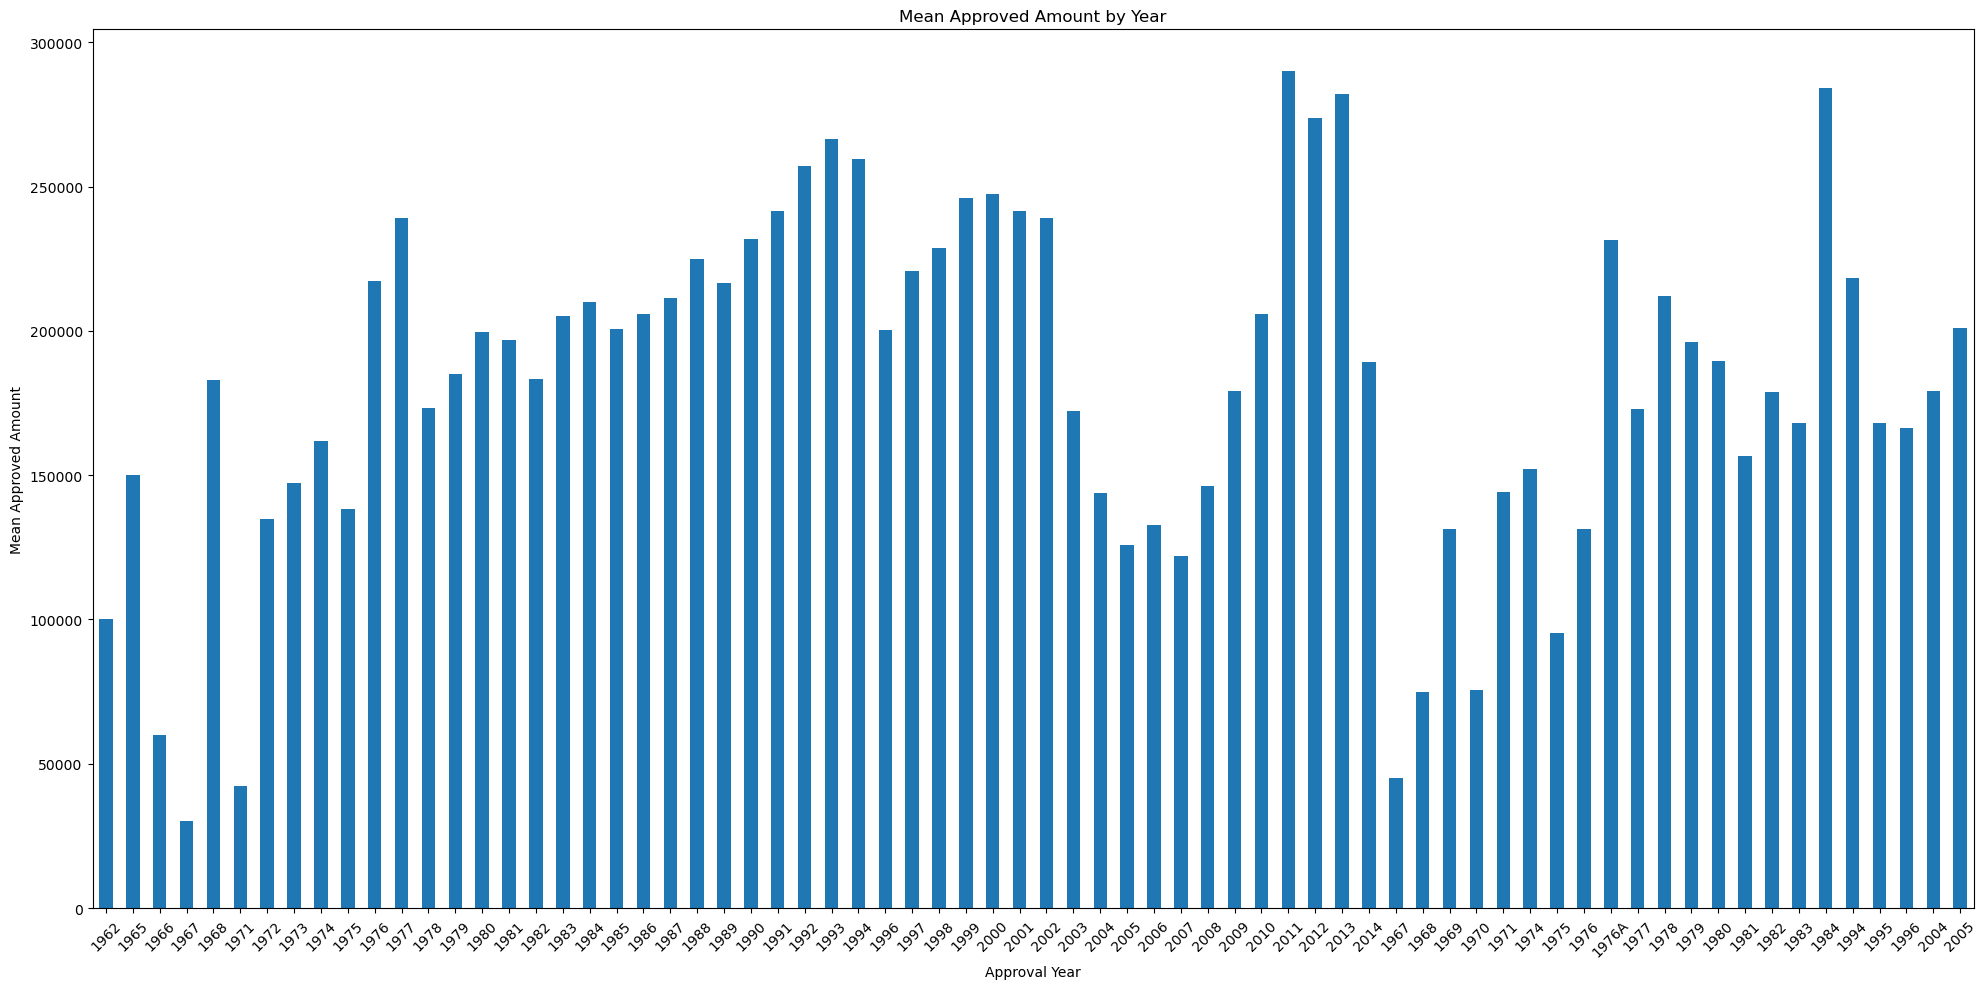

In [23]:
# Ensure GrAppv is in the correct numeric format if you haven't done that yet
df_copy['GrAppv'] = df_copy['GrAppv'].replace('[\$,]', '', regex=True).astype(float)

# Group by Approval Fiscal Year and calculate the mean
mean_approved_yearly = df_copy.groupby('ApprovalFY')['GrAppv'].mean()

# Create a bar plot
mean_approved_yearly.plot(kind='bar', title='Mean Approved Amount by Year', figsize=(20, 10))
plt.xlabel('Approval Year')
plt.ylabel('Mean Approved Amount')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

In [24]:
df_copy['ApprovalFY'].unique()

array([1997, 1980, 2006, 1998, 1999, 2000, 2001, 1972, 2003, 2004, 1978,
       1979, 1981, 2005, 1962, 1982, 1965, 1966, 1983, 1973, 1984, 2007,
       1985, 1986, 1987, 2008, 1988, 2009, 1989, 1991, 1990, 1974, 2010,
       1967, 2011, 1992, 1993, 2002, 2012, 2013, 1994, 2014, 1975, 1977,
       1976, 1968, '2004', '1994', '1979', '1976', '1967', '1975', '1974',
       '1977', '1981', '1982', '1983', '1984', '1978', '1980', '1968',
       '1976A', '1969', '1995', '1970', '2005', '1996', '1971', 1996,
       1971], dtype=object)

In [25]:
import pandas as pd

# Assuming df_copy is your DataFrame and ApprovalFY is the column of interest

# Step 1: Convert all entries to string
df_copy['ApprovalFY'] = df_copy['ApprovalFY'].astype(str)

# Step 2: Clean the strings
# Remove unwanted characters and handle invalid entries
df_copy['ApprovalFY'] = df_copy['ApprovalFY'].replace('[^0-9]', '', regex=True)

# Step 3: Convert to integer and handle any errors
df_copy['ApprovalFY'] = pd.to_numeric(df_copy['ApprovalFY'], errors='coerce')

# Step 4: Drop any NaN values resulting from invalid entries
df_copy = df_copy.dropna(subset=['ApprovalFY'])

# Convert to int type after dropping NaNs
df_copy['ApprovalFY'] = df_copy['ApprovalFY'].astype(int)

# Step 5: Check unique years again
unique_years = df_copy['ApprovalFY'].unique()
print("Unique Approval Years After Cleaning:\n", unique_years)


Unique Approval Years After Cleaning:
 [1997 1980 2006 1998 1999 2000 2001 1972 2003 2004 1978 1979 1981 2005
 1962 1982 1965 1966 1983 1973 1984 2007 1985 1986 1987 2008 1988 2009
 1989 1991 1990 1974 2010 1967 2011 1992 1993 2002 2012 2013 1994 2014
 1975 1977 1976 1968 1969 1995 1970 1996 1971]


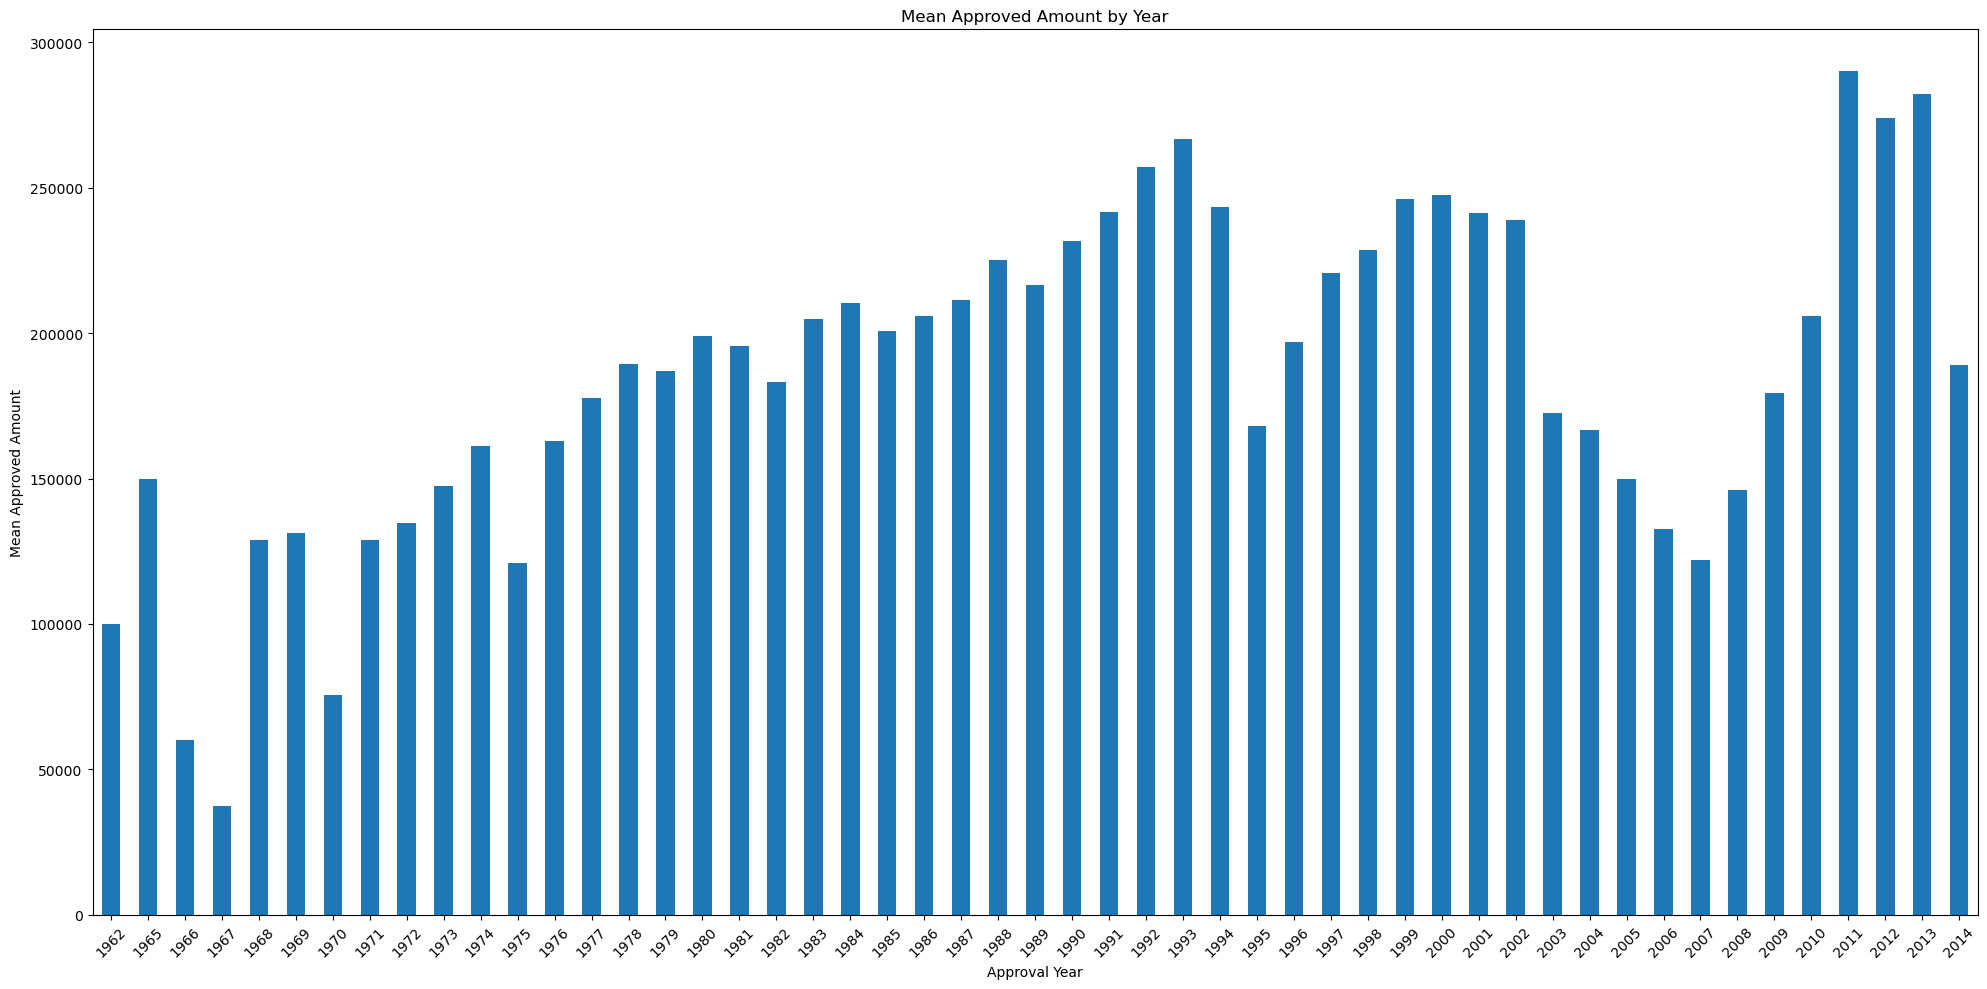

In [26]:
# Ensure GrAppv is in the correct numeric format if you haven't done that yet
df_copy['GrAppv'] = df_copy['GrAppv'].replace('[\$,]', '', regex=True).astype(float)

# Group by Approval Fiscal Year and calculate the mean
mean_approved_yearly = df_copy.groupby('ApprovalFY')['GrAppv'].mean()

# Create a bar plot
mean_approved_yearly.plot(kind='bar', title='Mean Approved Amount by Year', figsize=(20, 10))
plt.xlabel('Approval Year')
plt.ylabel('Mean Approved Amount')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

In [27]:
print("Mean Approved Amount by Year:\n", mean_approved_yearly)

Mean Approved Amount by Year:
 ApprovalFY
1962    100000.000000
1965    150000.000000
1966     60000.000000
1967     37500.000000
1968    129000.000000
1969    131175.000000
1970     75582.500000
1971    128750.000000
1972    134879.629630
1973    147384.615385
1974    161031.190476
1975    121063.333333
1976    162973.809524
1977    177740.145985
1978    189449.586777
1979    187048.863636
1980    199188.383648
1981    195442.190476
1982    183329.944367
1983    204978.747031
1984    210357.541048
1985    200583.530350
1986    205867.215770
1987    211385.021641
1988    225012.444679
1989    216504.622509
1990    231830.419678
1991    241669.301289
1992    257063.932535
1993    266611.195495
1994    243549.032787
1995    168152.237008
1996    197025.884897
1997    220833.465376
1998    228608.763744
1999    246050.792629
2000    247500.178139
2001    241394.892985
2002    239026.149580
2003    172376.677590
2004    166824.545512
2005    149778.454653
2006    132759.819792
2007    1220

In [28]:
charged_off_data=df[df['MIS_Status']=='CHGOFF']

In [29]:
charged_off_data.shape

(157558, 27)

In [30]:
import pandas as pd

# Step 1: Ensure ApprovalFY is treated as a string
df['ApprovalFY'] = df_copy['ApprovalFY'].astype(str)

# Step 2: Clean the strings
# Remove unwanted characters and handle invalid entries
df['ApprovalFY'] = df['ApprovalFY'].replace('[^0-9]', '', regex=True)

# Step 3: Convert to numeric, handle errors
df['ApprovalFY'] = pd.to_numeric(df['ApprovalFY'], errors='coerce')

# Step 4: Drop any NaN values resulting from invalid entries
df = df.dropna(subset=['ApprovalFY'])

# Convert to int type after dropping NaNs
df['ApprovalFY'] = df['ApprovalFY'].astype(int)

# Step 5: Check unique years again
unique_years = df['ApprovalFY'].unique()
print("Unique Approval Years After Cleaning:\n", unique_years)

# Step 6: Clean the ChgOffPrinGr values for charged_off_data
charged_off_data['ChgOffPrinGr'] = charged_off_data['ChgOffPrinGr'].replace('[\$,]', '', regex=True).astype(float)

# Step 7: Group by ApprovalFY and calculate the mean of ChgOffPrinGr
mean_charged_off = charged_off_data.groupby('ApprovalFY')['ChgOffPrinGr'].mean()

# Display the result
print("Mean Charged Off Principal by Year:\n", mean_charged_off)

Unique Approval Years After Cleaning:
 [1997 1980 2006 1998 1999 2000 2001 1972 2003 2004 1978 1979 1981 2005
 1962 1982 1965 1966 1983 1973 1984 2007 1985 1986 1987 2008 1988 2009
 1989 1991 1990 1974 2010 1967 2011 1992 1993 2002 2012 2013 1994 2014
 1975 1977 1976 1968 1969 1995 1970 1996 1971]
Mean Charged Off Principal by Year:
 ApprovalFY
1966     6084.000000
1971     8502.000000
1972    67254.571429
1973    54564.622222
1974    60149.638889
            ...     
1994    81001.974729
1995    77160.711420
1996    75491.175926
2004    65455.617224
2005    74803.980521
Name: ChgOffPrinGr, Length: 65, dtype: float64


In [31]:
mean_charged_off

ApprovalFY
1966     6084.000000
1971     8502.000000
1972    67254.571429
1973    54564.622222
1974    60149.638889
            ...     
1994    81001.974729
1995    77160.711420
1996    75491.175926
2004    65455.617224
2005    74803.980521
Name: ChgOffPrinGr, Length: 65, dtype: float64

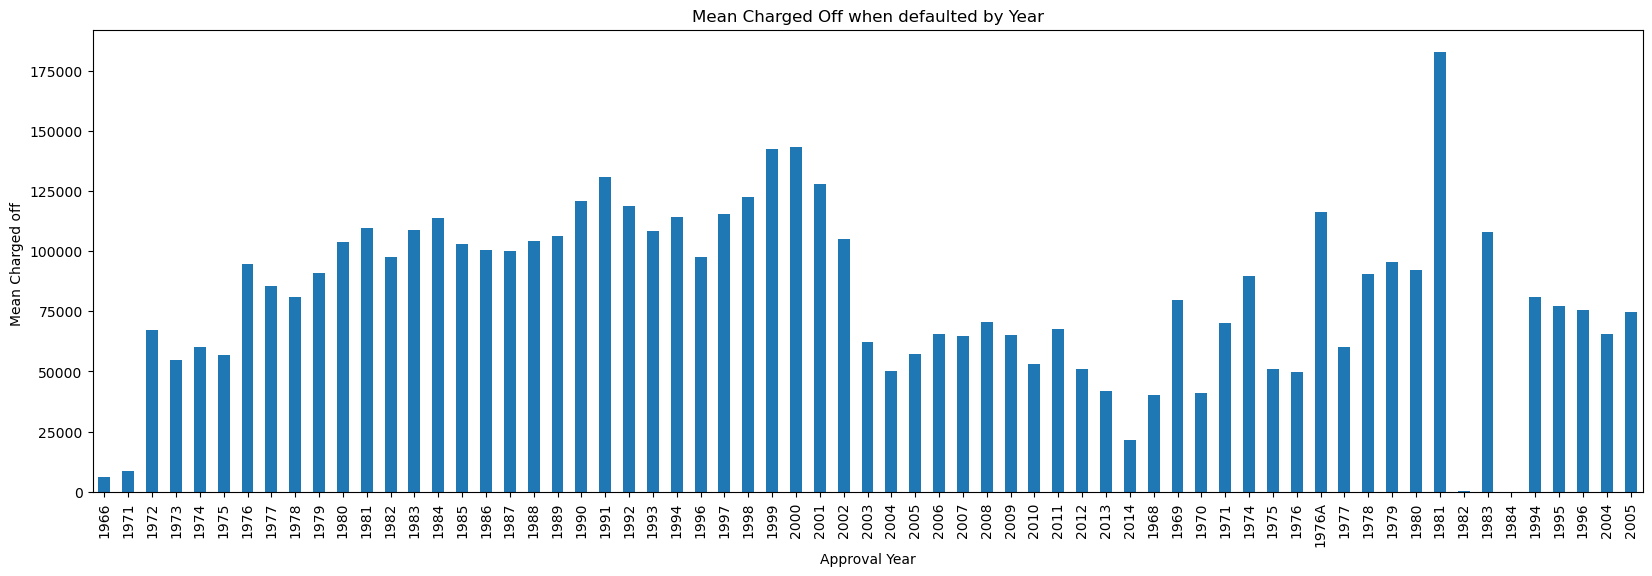

In [32]:
mean_charged_off.plot(kind='bar',title='Mean Charged Off when defaulted by Year',figsize=(20,6))
plt.xlabel('Approval Year')
plt.ylabel('Mean Charged off ')
plt.show()

In [33]:
le = LabelEncoder()
df['MIS_Status_Encoded'] = le.fit_transform(df['MIS_Status'])

# Step 2: Calculate correlation between NoEmp and the encoded MIS_Status
correlation = df['NoEmp'].corr(df['MIS_Status_Encoded'])

# Step 3: Display the correlation
print(f"Correlation between NoEmp and MIS_Status: {correlation}")

Correlation between NoEmp and MIS_Status: 0.025801637095868135


In [34]:
correlation_1=charged_off_data['NoEmp'].corr(charged_off_data['ChgOffPrinGr'])
correlation_1

0.0626124797508811

In [35]:
df['ApprovalFY'] = pd.to_numeric(df['ApprovalFY'], errors='coerce')
df['NoEmp'] = pd.to_numeric(df['NoEmp'], errors='coerce')
df['RetainedJob']=pd.to_numeric(df['RetainedJob'],errors='coerce')
df['CreateJob']=pd.to_numeric(df['CreateJob'],errors='coerce')

In [36]:
df['DisbursementGross'] = df['DisbursementGross'].replace('[\$,]', '', regex=True).astype(float)
df['BalanceGross']=df['BalanceGross'].replace('[\$,]', '', regex=True).astype(float)
df['SBA_Appv']=df['SBA_Appv'].replace('[\$,]', '', regex=True).astype(float)

In [37]:
# Convert columns to numeric
df['DisbursementGross'] = pd.to_numeric(df['ApprovalFY'], errors='coerce')
df['BalanceGross'] = pd.to_numeric(df['NoEmp'], errors='coerce')
df['SBA_Appv'] = pd.to_numeric(df['CreateJob'], errors='coerce')

In [38]:
numeric_cols = ['ApprovalFY', 'NoEmp', 'CreateJob', 'RetainedJob','Createjob',
                'DisbursementGross', 'BalanceGross', 'SBA_Appv']

In [39]:
print(df[['ApprovalFY', 'NoEmp', 'RetainedJob', 'CreateJob']].isna().sum())

ApprovalFY     0
NoEmp          0
RetainedJob    0
CreateJob      0
dtype: int64


In [40]:
le = LabelEncoder()
df['MIS_Status_Encoded'] = le.fit_transform(df['MIS_Status'])

In [41]:
print(df.columns.tolist())

['LoanNr_ChkDgt', 'Name', 'City', 'State', 'Zip', 'Bank', 'BankState', 'NAICS', 'ApprovalDate', 'ApprovalFY', 'Term', 'NoEmp', 'NewExist', 'CreateJob', 'RetainedJob', 'FranchiseCode', 'UrbanRural', 'RevLineCr', 'LowDoc', 'ChgOffDate', 'DisbursementDate', 'DisbursementGross', 'BalanceGross', 'MIS_Status', 'ChgOffPrinGr', 'GrAppv', 'SBA_Appv', 'MIS_Status_Encoded']


In [42]:
print([f'[{col}]' for col in df.columns])


['[LoanNr_ChkDgt]', '[Name]', '[City]', '[State]', '[Zip]', '[Bank]', '[BankState]', '[NAICS]', '[ApprovalDate]', '[ApprovalFY]', '[Term]', '[NoEmp]', '[NewExist]', '[CreateJob]', '[RetainedJob]', '[FranchiseCode]', '[UrbanRural]', '[RevLineCr]', '[LowDoc]', '[ChgOffDate]', '[DisbursementDate]', '[DisbursementGross]', '[BalanceGross]', '[MIS_Status]', '[ChgOffPrinGr]', '[GrAppv]', '[SBA_Appv]', '[MIS_Status_Encoded]']


In [43]:
print(df['CreateJob'].head())

0    0
1    0
2    0
3    0
4    7
Name: CreateJob, dtype: int64


In [44]:
numeric_cols = ['ApprovalFY', 'NoEmp', 'RetainedJob', 'CreateJob', 'DisbursementGross', 'BalanceGross', 'SBA_Appv']
correlation_matrix = df[numeric_cols + ['MIS_Status_Encoded']].corr()
correlation_matrix

,ApprovalFY,NoEmp,RetainedJob,CreateJob,DisbursementGross,BalanceGross,SBA_Appv,MIS_Status_Encoded
ApprovalFY,1.000000,-0.054390,-0.060415,-0.067027,1.000000,-0.054390,-0.067027,-0.200286
NoEmp,-0.054390,1.000000,0.015350,0.008626,-0.054390,1.000000,0.008626,0.025802
RetainedJob,-0.060415,0.015350,1.000000,0.993953,-0.060415,0.015350,0.993953,-0.012352
CreateJob,-0.067027,0.008626,0.993953,1.000000,-0.067027,0.008626,1.000000,-0.011956
DisbursementGross,1.000000,-0.054390,-0.060415,-0.067027,1.000000,-0.054390,-0.067027,-0.200286
BalanceGross,-0.054390,1.000000,0.015350,0.008626,-0.054390,1.000000,0.008626,0.025802
SBA_Appv,-0.067027,0.008626,0.993953,1.000000,-0.067027,0.008626,1.000000,-0.011956
MIS_Status_Encoded,-0.200286,0.025802,-0.012352,-0.011956,-0.200286,0.025802,-0.011956,1.000000


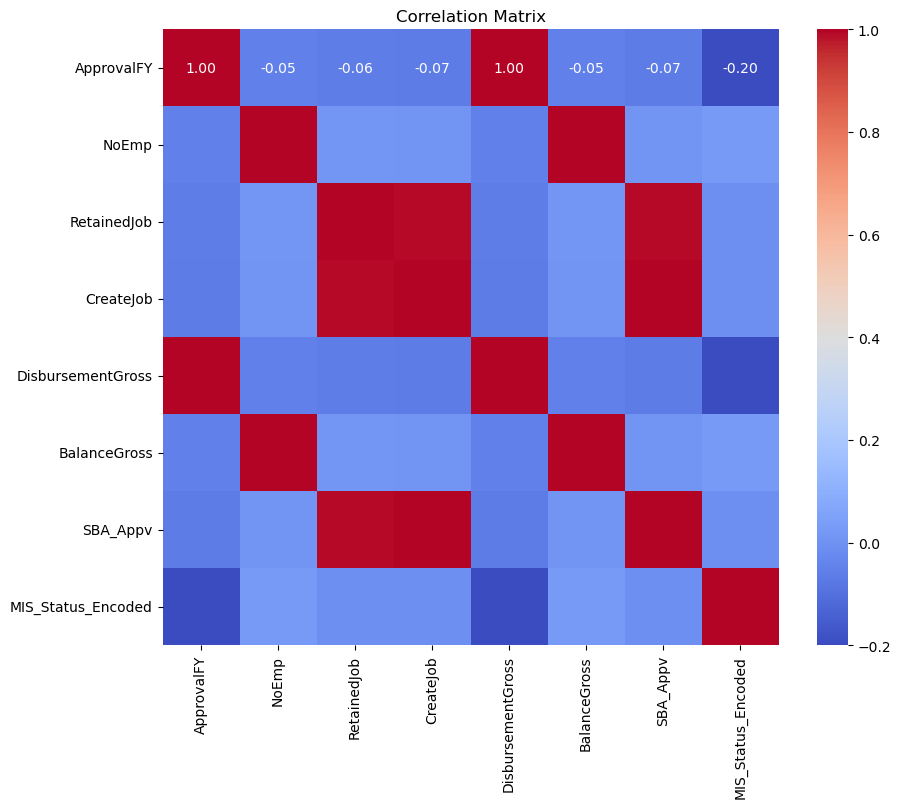

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

In [46]:
df = df[df['MIS_Status'].notna() & (df['MIS_Status'] != '')]

In [47]:
print("Number of rows after removing blanks in MIS_Status:", df.shape[0])

Number of rows after removing blanks in MIS_Status: 897167


In [48]:
le = LabelEncoder()
df['MIS_Status_Encoded'] = le.fit_transform(df['MIS_Status'])
df['ApprovalFY'] = pd.to_numeric(df['ApprovalFY'], errors='coerce')
df['NoEmp'] = pd.to_numeric(df['NoEmp'], errors='coerce')
df['RetainedJob']=pd.to_numeric(df['RetainedJob'],errors='coerce')
df['CreateJob']=pd.to_numeric(df['CreateJob'],errors='coerce')
df['DisbursementGross'] = df['DisbursementGross'].replace('[\$,]', '', regex=True).astype(float)
df['BalanceGross']=df['BalanceGross'].replace('[\$,]', '', regex=True).astype(float)
df['SBA_Appv']=df['SBA_Appv'].replace('[\$,]', '', regex=True).astype(float)
# Convert columns to numeric
df['DisbursementGross'] = pd.to_numeric(df['ApprovalFY'], errors='coerce')
df['BalanceGross'] = pd.to_numeric(df['NoEmp'], errors='coerce')
df['SBA_Appv'] = pd.to_numeric(df['CreateJob'], errors='coerce')
numeric_cols = ['ApprovalFY', 'NoEmp', 'CreateJob', 'RetainedJob','Createjob',
                'DisbursementGross', 'BalanceGross', 'SBA_Appv']

In [49]:
numeric_cols = ['ApprovalFY', 'NoEmp', 'RetainedJob', 'CreateJob', 'DisbursementGross', 'BalanceGross', 'SBA_Appv']
correlation_matrix = df[numeric_cols + ['MIS_Status_Encoded']].corr()

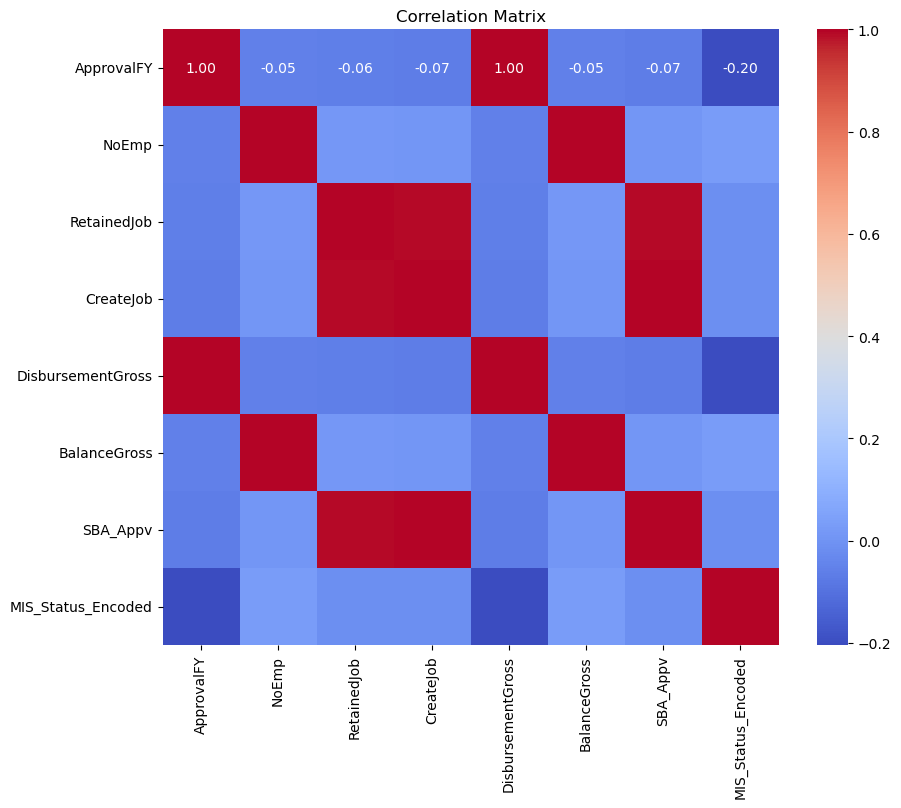

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

In [51]:
import statsmodels.api as sm

# Define the independent variables (predictors) and the dependent variable (response)
X = df[['ApprovalFY', 'DisbursementGross', 'SBA_Appv']]
y = df['MIS_Status_Encoded']

# Add a constant to the model (intercept)
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Get the summary which includes p-values
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:     MIS_Status_Encoded   R-squared:                      -0.103
Model:                            OLS   Adj. R-squared:                 -0.103
Method:                 Least Squares   F-statistic:                -2.802e+04
Date:                Wed, 27 Nov 2024   Prob (F-statistic):               1.00
Time:                        22:36:55   Log-Likelihood:            -4.5024e+05
No. Observations:              897167   AIC:                         9.005e+05
Df Residuals:                  897163   BIC:                         9.005e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                27.3660      0.20

In [52]:
charged_off_counts = charged_off_data['UrbanRural'].value_counts()

print("Charged-off loans in Urban, Rural, and Undefined areas:\n", charged_off_counts)

Charged-off loans in Urban, Rural, and Undefined areas:
 UrbanRural
1    114867
0     22978
2     19713
Name: count, dtype: int64


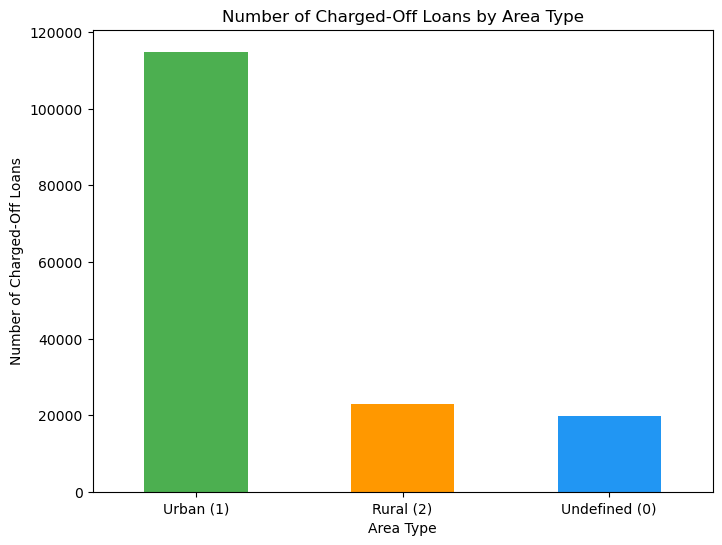

In [53]:
# Plot the counts
# Rename index for clarity
charged_off_counts.index = ['Urban (1)', 'Rural (2)', 'Undefined (0)']
plt.figure(figsize=(8, 6))
charged_off_counts.plot(kind='bar', color=['#4CAF50', '#FF9800', '#2196F3'])
plt.title('Number of Charged-Off Loans by Area Type')
plt.xlabel('Area Type')
plt.ylabel('Number of Charged-Off Loans')
plt.xticks(rotation=0)
plt.show()

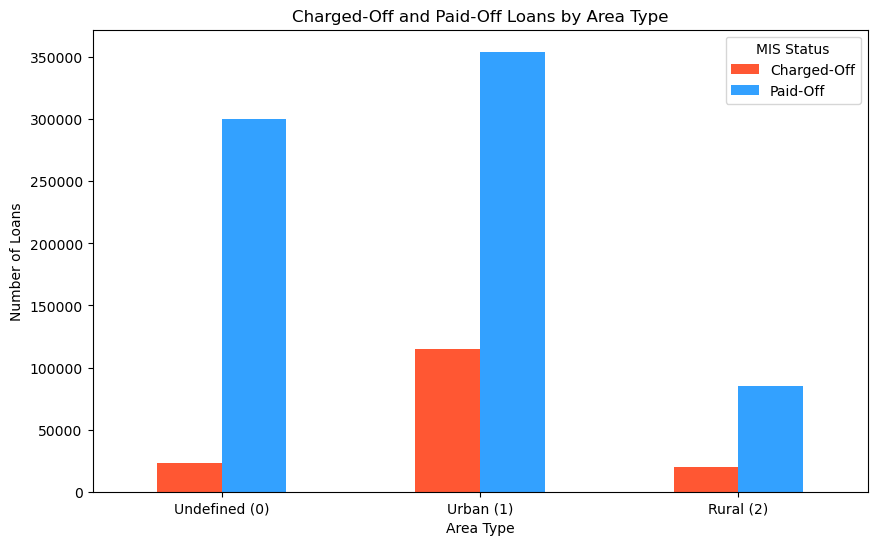

In [54]:
import matplotlib.pyplot as plt

# Filter and count charged-off and paid-off loans by area type
status_counts = df[df['MIS_Status'].isin(['CHGOFF', 'P I F'])] \
    .groupby(['UrbanRural', 'MIS_Status']).size().unstack(fill_value=0)

# Rename index for clarity
status_counts.index = ['Undefined (0)', 'Urban (1)', 'Rural (2)']

# Plot the results
status_counts.plot(kind='bar', stacked=False, color=['#FF5733', '#33A1FF'], figsize=(10, 6))
plt.title('Charged-Off and Paid-Off Loans by Area Type')
plt.xlabel('Area Type')
plt.ylabel('Number of Loans')
plt.xticks(rotation=0)
plt.legend(title='MIS Status', labels=['Charged-Off', 'Paid-Off'])
plt.show()

In [55]:
df['RevLineCr_Cat'] = df['RevLineCr'].apply(lambda x: 'Yes' if x == 'Y' else 'No')
revenue_line_count = df[df['MIS_Status'].isin(['CHGOFF', 'P I F'])] \
    .groupby(['RevLineCr_Cat', 'MIS_Status']).size().unstack(fill_value=0)
revenue_line_count.index=['Yes','No']

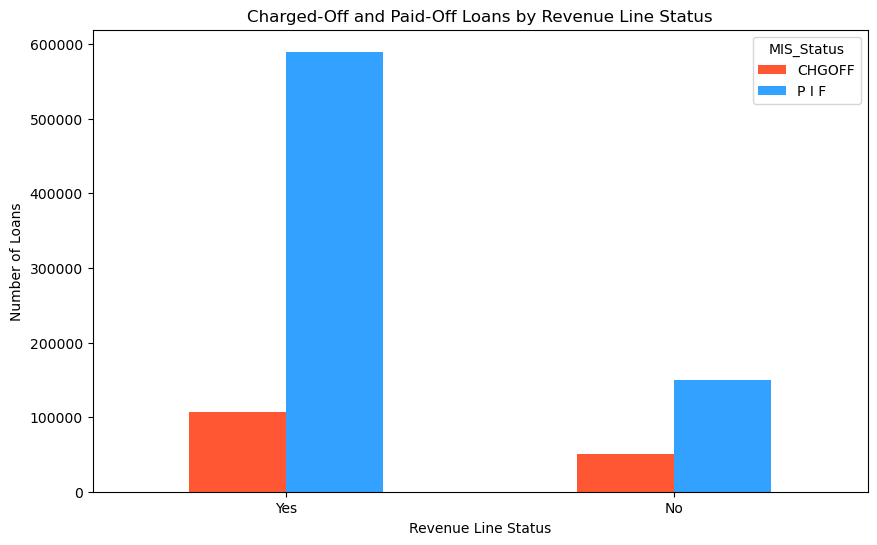

In [56]:
revenue_line_count.plot(kind='bar', stacked=False, color=['#FF5733', '#33A1FF'], figsize=(10, 6))
plt.title('Charged-Off and Paid-Off Loans by Revenue Line Status')
plt.xlabel('Revenue Line Status')
plt.ylabel('Number of Loans')
plt.xticks(rotation=0)
plt.show()

In [57]:
revenue_line_count = df[df['MIS_Status'].isin(['CHGOFF', 'P I F'])].groupby(['RevLineCr_Cat', 'MIS_Status']).size().unstack(fill_value=0)
revenue_line_count.index=['Existing Business','New Business']

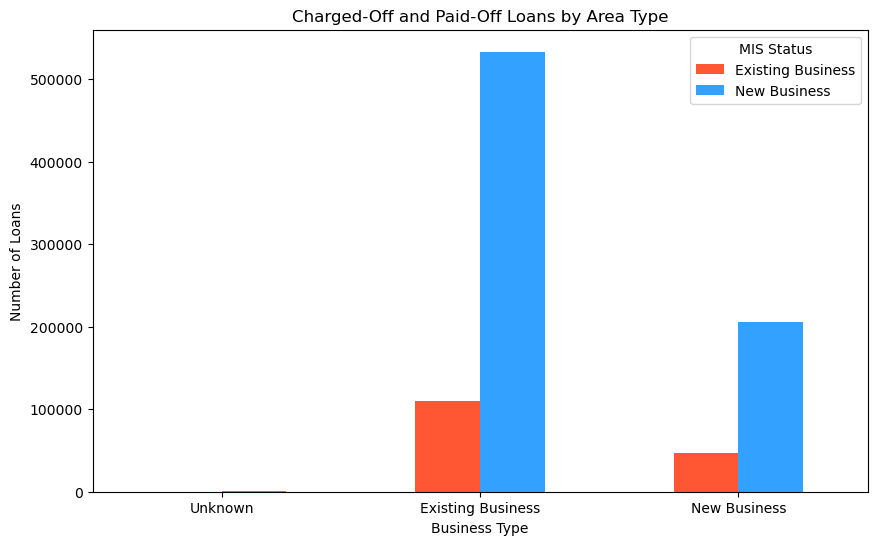

In [58]:
Business_counts = df[df['MIS_Status'].isin(['CHGOFF', 'P I F'])].groupby(['NewExist', 'MIS_Status']).size().unstack(fill_value=0)
Business_counts.index = ['Unknown','Existing Business','New Business']

# Plot the results
Business_counts.plot(kind='bar', stacked=False, color=['#FF5733', '#33A1FF'], figsize=(10, 6))
plt.title('Charged-Off and Paid-Off Loans by Area Type')
plt.xlabel('Business Type')
plt.ylabel('Number of Loans')
plt.xticks(rotation=0)
plt.legend(title='MIS Status', labels=['Existing Business', 'New Business','unknown'])
plt.show()

In [59]:
df['NewExist'].value_counts()

NewExist
1.0    643446
2.0    252559
0.0      1028
Name: count, dtype: int64

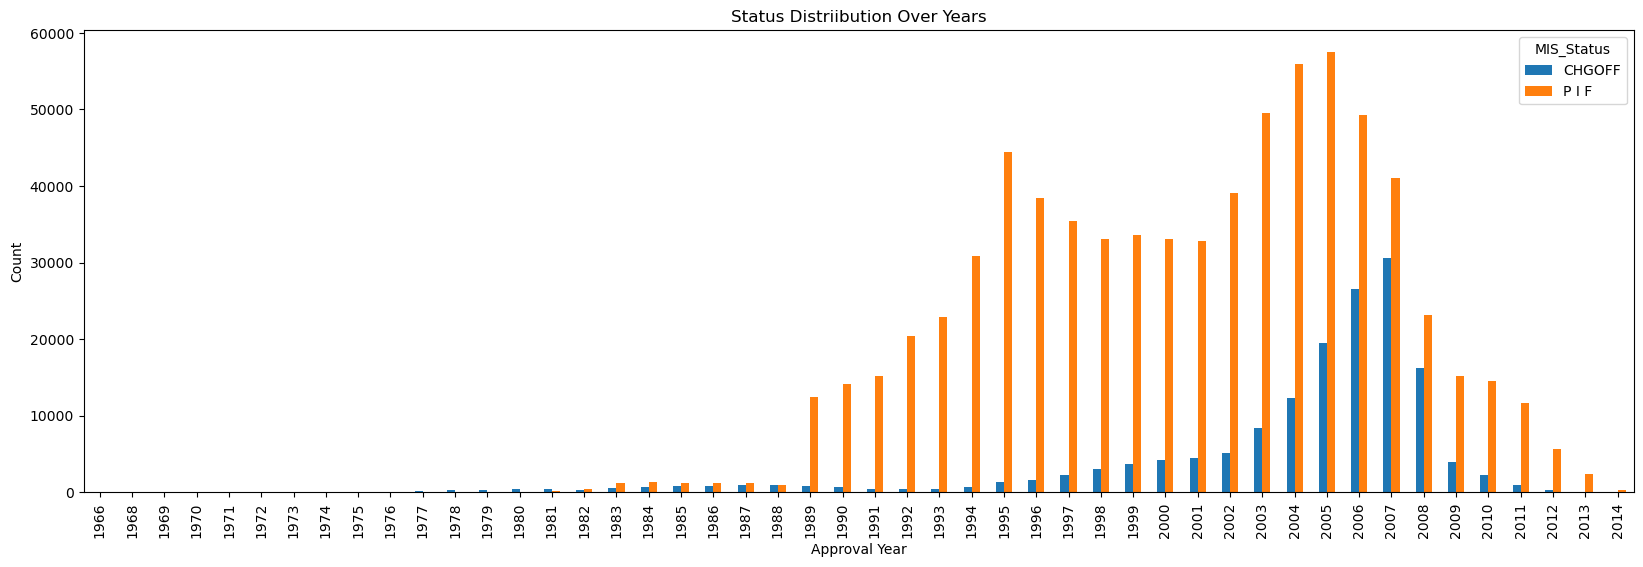

In [60]:
status_distribution=df.groupby(['ApprovalFY','MIS_Status']).size().unstack()
status_distribution.plot(kind='bar',title='Status Distriibution Over Years',figsize=(20,6))
plt.xlabel('Approval Year')
plt.ylabel('Count')
plt.show()